In [169]:
from sklearn.datasets import load_iris
iris = load_iris()

In [170]:
import numpy as np
import pandas as pd

In [171]:
X = iris.data[:100,:]
y = iris.target[:100]

In [172]:
X = np.array(X)
y = np.array(y)

In [173]:
y = y.reshape([100,1])
y.shape

(100, 1)

In [174]:
iris_df = pd.DataFrame(X,
                       columns=["sepal_length","sepal_width", "petal_length", "petal_width"])

iris_label = pd.DataFrame(y, columns=["Species"])


In [175]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [176]:
iris_label.head()

,Species
0,0
1,0
2,0
3,0
4,0


 ## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

In [177]:
X = iris.data[:100,:]
y = iris.target[:100]

In [178]:
def first(X):
    
    Theta = np.random.rand(1, X.shape[1]+1) 
    return Theta

In [179]:
Theta = first(X)

In [180]:
Theta

array([[0.54488318, 0.4236548 , 0.64589411, 0.43758721, 0.891773  ]])

In [181]:
Theta[0,0] = 0
Theta

array([[0.        , 0.4236548 , 0.64589411, 0.43758721, 0.891773  ]])

In [182]:
def logistic_hypothesis(X=X, bias=True):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    if bias:
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a ,X])
    z = (Theta @ X.T)
    y_ = 1 / (1 + (np.exp(-z)))
    return y_

In [183]:
y_ = logistic_hypothesis(X)

 ## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

θ
j
:=
θ
j
−
α
1
m
m
∑
i
=
1
 
[
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
]
α
 : 学習率

i
 : サンプルのインデックス

j
 : 特徴量のインデックス

雛形

ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

In [184]:
def get_error(y):
    error = y_ - y
    return error

In [185]:
error = get_error(y)

In [186]:
def _gradient_descent(X, bias=True):
    if bias:
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a ,X])
        Theta[0,0] = 0
    Theta2 = ((1/X.shape[0]) * (error * X.T).sum(axis=1)) + ((1/X.shape[0]) * Theta)
    return Theta2

In [187]:
theta = _gradient_descent(X)

In [188]:
theta

array([[0.49657501, 2.49022088, 1.70948856, 0.7294567 , 0.13074156]])

 ## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 
h
θ
(
x
)
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [326]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose, lambda_): ##, verbose
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lambda_=lambda_
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
#     def _first(self, X):
#         if self.bias:
#             a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
#             self.X = np.hstack([a ,X])
#             if X_val:
#                 a = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
#                 self.X_val = np.hstack([a ,X_val])
        
#         self.Theta = np.random.rand(1, self.X.shape[1])
#         return self.Theta 
    
    
    def _logistic_hypothesis(self, X):
        self.z = (self.Theta @ X.T)
        self.y_pred = 1 / (1 + (np.exp(-self.z)))
#         print(self.y_pred.shape, "y____")
        return self.y_pred
        
        
    def _get_error(self, y):
        self.error = self.y_pred - y
        return self.error
    
    
    def _gradient_descent(self, X):
        if self.bias:
            self.Theta2 = np.copy(self.Theta)
            self.Theta2[0,0] = 0
            self.Theta =  self.Theta - self.lr * (((1/X.shape[0]) * (self.error * X.T).sum(axis=1)) + ((self.lambda_/X.shape[0]) * self.Theta2))  
        else:
            self.Theta =  self.Theta - self.lr * (((1/X.shape[0]) * (self.error * X.T).sum(axis=1))  + ((self.lambda_/X.shape[0]) * self.Theta))
            return self.Theta
    
    
    def _loss_fnk(self, y):
#         print(self.y_pred.shape,'ybar')
        if self.bias:
#             print(self.y_pred.shape,"<<<<<<<")
#             print(y.shape,"///////")
#             print(((-y * np.log(self.y_pred)) - ((1 - y) * np.log(self.y_pred))).sum().shape)
            self.Theta2 = np.copy(self.Theta)
            self.Theta2[0,0] = 0
            log = (1/X.shape[0]) * (((-y * np.log(self.y_pred)) - ((1 - y) * np.log(1 - self.y_pred))).sum(axis=1))
            reg = ((self.Theta2**2).sum(axis=1))
            lam =  (self.lambda_// (2 * X.shape[0])) 
            self._loss_f = log + lam*reg
        else:
            log = (1/X.shape[0]) * (((-y * np.log(self.y_pred)) - ((y) * np.log(1 - self.y_pred))).sum(axis=1))
            reg = ((self.Theta**2).sum(axis=1))
            lam =  (self.lambda_ / (2 * X.shape[0])) 
            self._loss_f = log + lam*reg
#             self.loss_f = (1/self.X.shape[0]) * ((y * np.log(y_)) - ((1 -y) * np.log(y_))).sum(axis=1) + (0.1 / (2 * self.X.shape[0])) * ((self.Theta**2).sum(axis=1)) 
        return self._loss_f

        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
            
        """
        if self.bias:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
            if X_val is not None:
                a = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
                X_val = np.hstack([a ,X_val])
        np.random.seed(0)
        self.Theta = np.random.rand(1, X.shape[1])
#         self._logistic_hypothesis(X)

        
        for i in range(self.iter):
            self._logistic_hypothesis(X)
            self._get_error(y)
            self._gradient_descent(X)

#             print(self._loss_fnk(y).shape)
            self.loss[i] = self._loss_fnk(y)
            if (X_val is not None) and (y_val is not None):
                self._logistic_hypothesis(X_val)
#                 print(self.y_.predshape,"ybar2")
#                 print(y.shape,"y2")
                self._get_error(y_val)
#                 self._logistic_hypothesis(X_val)
                self.val_loss[i] = self._loss_fnk(y_val)
                if self.loss[i] == 0:
                    break

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)
            print(self.val_loss)
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
#             if (X_val is not None) and (y_val is not None)::
#                 a = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
#                 X_val = np.hstack([a ,X_val])
        
        
        self.z = (self.Theta @ X.T)
        self.y_ = 1 / (1 + (np.exp(-self.z)))
        return np.where(self.y_ < 0.5, 0, 1)
        


    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
        
        self.z = (self.Theta @ X.T)
        self.y_ = 1 / (1 + (np.exp(-self.z)))
        return self.y_
    
#     def accuracy(X,y):
#         y_pred = self.predict(X)
        


 ## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [327]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [328]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [329]:
X_test.shape

(30, 2)

In [333]:
Sc = ScratchLogisticRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True, lambda_=0.1)
Sc.fit(X=X, y=y, X_val=None, y_val=None)

[2.50900361 2.50830933 2.50761506 ... 0.44039496 0.44038211 0.44036928]
[0. 0. 0. ... 0. 0. 0.]


In [334]:
Sc.predict(X)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [335]:
Sc.predict_proba(X)

array([[0.39768052, 0.41188993, 0.41303961, 0.44683932, 0.40476527,
        0.41559091, 0.43347518, 0.41789721, 0.44801224, 0.42508794,
        0.38950969, 0.44566699, 0.41905171, 0.41534181, 0.3251845 ,
        0.36868897, 0.36404564, 0.39768052, 0.39427644, 0.41074121,
        0.41559091, 0.41074121, 0.38115846, 0.43722592, 0.48613286,
        0.43114659, 0.43114659, 0.40362279, 0.39063839, 0.45296373,
        0.44566699, 0.38950969, 0.40362279, 0.36979389, 0.42508794,
        0.37892293, 0.35724586, 0.41188993, 0.43464058, 0.41074121,
        0.39176827, 0.42740839, 0.43464058, 0.43114659, 0.46407342,
        0.41905171, 0.42392894, 0.43347518, 0.39654471, 0.40476527,
        0.6930377 , 0.70740807, 0.72158228, 0.70621239, 0.71250371,
        0.74824282, 0.73512707, 0.66247509, 0.70642515, 0.7132648 ,
        0.67990319, 0.70423995, 0.67471887, 0.74645125, 0.65263019,
        0.67702215, 0.75375734, 0.6990597 , 0.71946509, 0.68854621,
        0.76727579, 0.66821343, 0.7557036 , 0.74

In [336]:
Sc.loss

array([2.50900361, 2.50830933, 2.50761506, ..., 0.44039496, 0.44038211,
       0.44036928])

In [337]:
Sc.val_loss

array([0., 0., 0., ..., 0., 0., 0.])

In [363]:
Sc = ScratchLogisticRegression(num_iter=10000, lr=0.01, bias=True, verbose=True, lambda_ = 10)
Sc.fit(X=X_train, y=y_train, X_val=X_test, y_val=y_test)

[1.22317815 1.18793927 1.1528534  ... 0.11569854 0.11569727 0.115696  ]
[1.24890195 1.21214215 1.1755599  ... 0.11242174 0.11242005 0.11241837]


In [364]:
Sc.predict_proba(X_test)

array([[0.25091525, 0.8771886 , 0.20208352, 0.86729556, 0.84051873,
        0.66772822, 0.18866624, 0.88485714, 0.86819281, 0.82650817,
        0.79813662, 0.79217706, 0.86302736, 0.17721664, 0.23163021,
        0.25552797, 0.15745303, 0.32013156, 0.20334711, 0.22594688,
        0.25091525, 0.78813247, 0.24042662, 0.78608871, 0.21752852,
        0.22518201, 0.22170913, 0.81087216, 0.77429191, 0.8868807 ,
        0.71273654, 0.76204147, 0.85769267, 0.86011817, 0.85715741,
        0.22731717, 0.25469591, 0.88234839, 0.88485714, 0.82935943,
        0.21545967, 0.82298242, 0.20804789, 0.20604546, 0.21340513,
        0.21678416, 0.2113649 , 0.19624777, 0.20804789, 0.2617038 ]])

In [365]:
y_pred = Sc.predict(X_test)

In [366]:
Sc.loss

array([1.22317815, 1.18793927, 1.1528534 , ..., 0.11569854, 0.11569727,
       0.115696  ])

In [367]:
Sc.val_loss

array([1.24890195, 1.21214215, 1.1755599 , ..., 0.11242174, 0.11242005,
       0.11241837])

In [368]:
Sc.iter

10000

In [369]:
y_pred = y_pred.reshape(y_test.shape)

In [370]:
y_test.shape

(50,)

In [371]:
# print("正解率:{}".format(Sc.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

適合率:1.0
再現率:1.0
F値 :1.0
[[26  0]
 [ 0 24]]


## 【問題7】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

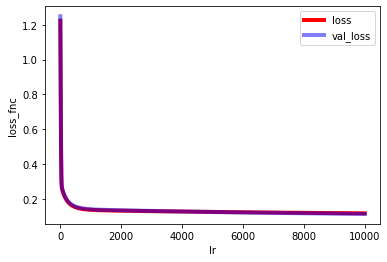

In [374]:
import matplotlib.pyplot as plt
plt.plot(range(Sc.iter), Sc.loss, linewidth=4, color="red", label="loss")
plt.plot(range(Sc.iter), Sc.val_loss, linewidth=4, color="blue", label="val_loss", alpha=0.5)
plt.ylabel("loss_fnc")
plt.xlabel("lr")
plt.legend()

 ## 【問題8】決定領域の可視化
決定領域を可視化してください。

In [375]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [376]:
X = iris.data[:100,:]
y = iris.target[:100]

In [377]:
X = X[:,[0,2]]

In [378]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.5, random_state=0,
)

In [379]:
Sc = ScratchLogisticRegression(num_iter=10000, lr=1, bias=True, verbose=True, lambda_=0.01)
Sc.fit(X=X_train, y=y_train, X_val=X_test, y_val=y_test)
# knc_pred = knc.predict(X_test_std)

[1.22317815e+00 2.72716422e+00 2.55614241e+00 ... 1.13412889e-03
 1.13412707e-03 1.13412524e-03]
[2.54504822e+00 2.67973032e+00 2.39649332e-01 ... 9.35552691e-04
 9.35544666e-04 9.35536642e-04]


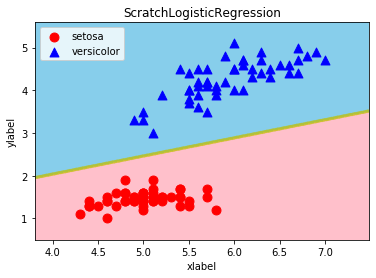

In [381]:
decision_region(X, y, Sc, 
                 step=0.01, title='ScratchLogisticRegression', 
                 xlabel='xlabel', ylabel='ylabel', 
                 target_names=['setosa','versicolor'])

 ## 【問題9】（アドバンス課題）重みの保存

In [358]:
np.savez("Theta", Sc.Theta)

In [359]:
archive = np.load("Theta.npz")

In [360]:
archive.files

['arr_0']

In [361]:
archive["arr_0"]

array([[-2.30116244, -2.81654339,  6.64859364]])

In [362]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])